## Martin Dionne

In [2]:
import pandas as pd
import zipfile
import sqlite3

# 1.1 Movies Database

Take the movies dataset and turn it into a single `sqlite` database. It should have one table for each csv file in the movies dataset

In [3]:
zf = zipfile.ZipFile('data/movies.zip')
dfs = [pd.read_csv(zf.open(f)) for f in zf.namelist()]

In [4]:
#df.to_sql('table_name', conn)
conn = sqlite3.connect('data/movies.db')

for i in range(0,len(dfs)):
    dfs[i].to_sql(
        # use filename as table name
        name=zf.namelist()[i].replace('.csv',''),
        con=conn, 
        schema=None, 
        if_exists='replace', 
        index=True, 
    )

In [5]:
#conn = sqlite3.connect('data/movies.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", con=conn)

,name
0,credits
1,keywords
2,links
3,links_small
4,movies_metadata
5,ratings
6,ratings_small


# 1.2 Queries

**1.2.1** Use a single query to pull the original title of movies with a budget above $5m

**1.2.2** Use a query to pull the english-language films with the word `war` in their title

**1.2.3** Left join the average ratings from the `ratings` table onto the `movies_metadata` table, so you can have a relation between budget and rating. Hint: use a subquery.

In [6]:
#pd.read_sql("SELECT * FROM ratings limit 10", con=conn)
#pd.read_sql("SELECT * FROM movies_metadata limit 10", con=conn)

In [7]:
# 1.2.1 Use a single query to pull the original title of movies with a budget above $5m
pd.read_sql("SELECT original_title FROM movies_metadata WHERE budget > 5e6", con=conn)

,original_title
0,Jumanji
1,Heat
2,Sabrina
3,GoldenEye
4,The American President
...,...
2182,The Emoji Movie
2183,Pattaya
2184,House of the Long Shadows
2185,Все и сразу


In [8]:
# 1.2.2 Use a query to pull the english-language films with the word `war` in their title
pd.read_sql("""
SELECT 
    original_title 
FROM movies_metadata 
WHERE original_language = 'en' 
    AND original_title LIKE '% war %'
    OR original_title LIKE '% war' 
    OR original_title LIKE 'war %' 
""", con=conn)

,original_title
0,The War
1,The War Room
2,War Stories Our Mother Never Told Us
3,In Love and War
4,The War at Home
...,...
120,War Don Don
121,War for the Planet of the Apes
122,Underworld: Endless War
123,War Machine


In [9]:
# 1.2.3 Left join the average ratings from the `ratings` table onto the `movies_metadata` table
pd.read_sql("""
SELECT 
    id,
    original_title,
    vote_average, 
    vote_count,
    rt.rating_average,
    rt.rating_count
FROM movies_metadata as mm 
LEFT JOIN (
    SELECT 
        --DISTINCT userID,
        movieId,
        AVG(rating) as rating_average,
        COUNT(rating) as rating_count
    FROM ratings 
    GROUP BY movieId
) as rt
ON mm.id = rt.movieId
ORDER BY rating_count DESC
""", con=conn)

,id,original_title,vote_average,vote_count,rating_average,rating_count
0,318,The Million Dollar Hotel,5.9,76.0,4.429015,91082.0
1,296,Terminator 3: Rise of the Machines,5.9,2177.0,4.169975,87901.0
2,593,Солярис,7.7,364.0,4.152246,84078.0
3,260,The 39 Steps,7.4,217.0,4.132299,77045.0
4,480,Monsoon Wedding,6.8,59.0,3.660238,74355.0
...,...,...,...,...,...,...
45461,30840,Robin Hood,5.7,26.0,NaN,NaN
45462,439050,رگ خواب,4.0,1.0,NaN,NaN
45463,67758,Betrayal,3.8,6.0,NaN,NaN
45464,227506,Satana likuyushchiy,0.0,0.0,NaN,NaN


# 2. Baseball Database

The [Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/) has an sqlite version. Download it for these exercises.

**2.1** Which player has had the most homeruns?

**2.2** Is there a relation between how many homeruns a player has made in a year and his salary that year? Pull both colums together in a single query



In [10]:
conn = sqlite3.connect('data/lahmansbaseballdb.sqlite')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", con=conn)

,name
0,allstarfull
1,appearances
2,awardsmanagers
3,awardsplayers
4,awardssharemanagers
5,awardsshareplayers
6,batting
7,battingpost
8,collegeplaying
9,divisions


In [11]:
#pd.read_sql("SELECT * FROM people", con=conn)
#pd.read_sql("SELECT * FROM batting", con=conn)
#pd.read_sql("SELECT * FROM salaries", con=conn)

In [12]:
# 2.1 Which player has had the most homeruns?
pd.read_sql("""
SELECT 
    pp.playerID,
    nameFirst,
    nameLast,
    bt.HR
FROM people as pp
INNER JOIN (
    SELECT 
        playerID,
        SUM(HR) as HR
    FROM batting
    GROUP BY playerID
) as bt
ON pp.playerID = bt.playerID
ORDER BY HR DESC
""", con=conn)

,playerID,nameFirst,nameLast,HR
0,bondsba01,Barry,Bonds,762
1,aaronha01,Hank,Aaron,755
2,ruthba01,Babe,Ruth,714
3,rodrial01,Alex,Rodriguez,696
4,mayswi01,Willie,Mays,660
...,...,...,...,...
19684,zuberbi01,Bill,Zuber,0
19685,zumayjo01,Joel,Zumaya,0
19686,zupofr01,Frank,Zupo,0
19687,zuverge01,George,Zuverink,0


In [13]:
# 2.2 Is there a relation between how many homeruns a player has made in a year and his salary that year?
df = pd.read_sql("""
SELECT 
    sl.playerID,
    sl.salary,
    sl.yearID,
    bt.HR
FROM salaries as sl
INNER JOIN (
    SELECT 
        playerID,
        yearID,
        HR
    FROM batting
    GROUP BY playerID, yearID
) as bt
ON sl.playerID = bt.playerID AND
sl.yearID = bt.yearID
ORDER BY salary DESC
""", con=conn)

df

,playerID,salary,yearID,HR
0,kershcl01,33000000.0,2016,0
1,rodrial01,33000000.0,2009,30
2,rodrial01,33000000.0,2010,30
3,kershcl01,32571000.0,2015,0
4,rodrial01,32000000.0,2011,16
...,...,...,...,...
25598,willire01,60000.0,1986,4
25599,wittbo01,60000.0,1986,0
25600,yettri01,60000.0,1986,0
25601,silveda01,10900.0,1993,1


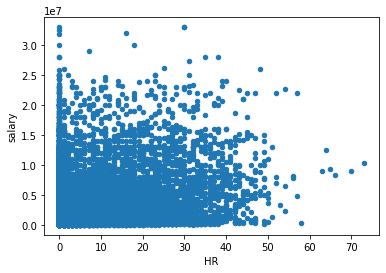

In [14]:
#df = df.loc[df.yearID >= 2009]
df.plot(kind='scatter', x='HR', y='salary')

In [15]:
import statsmodels.api as sm
sm.OLS(df.salary, sm.add_constant(df.HR)).fit(cov_type='HC2').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          1.22e-227
Time:                        18:56:13   Log-Likelihood:            -4.2082e+05
No. Observations:               25603   AIC:                         8.417e+05
Df Residuals:                   25601   BIC:                         8.417e+05
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.523e+06   2.23e+04     68.202      0.000    1.48e+06    1.57e+06
HR          1.141e+05   3507.711     32.541      0.000    1.07e+05    1.21e+05
==============================================================================
Omnibus:                    16375.622   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190461.128
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      14.956   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [16]:
# there is a relation between HR and salary but it's very weak
# HR/year is not the only factor (i.e. starting pitcher have high salary but low HR count)